___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.4f' % x)



In [2]:
data = pd.read_csv('Churn_Modelling.csv')

df=data.copy()

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.0000,2,1,0,96270.6400,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.6100,1,1,1,101699.7700,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.0000,1,0,1,42085.5800,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.3100,2,1,0,92888.5200,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum().any()

False

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.RowNumber

0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: RowNumber, Length: 10000, dtype: int64

In [7]:
df.drop('RowNumber', axis=1, inplace=True)

In [8]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.0000,2,1,0,96270.6400,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.6100,1,1,1,101699.7700,0
9997,15584532,Liu,709,France,Female,36,7,0.0000,1,0,1,42085.5800,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.3100,2,1,0,92888.5200,1


In [9]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,15690940.5694,650.5288,38.9218,5.0128,76485.8893,1.5302,0.7055,0.5151,100090.2399,0.2037
std,71936.1861,96.6533,10.4878,2.8922,62397.4052,0.5817,0.4558,0.4998,57510.4928,0.4028
min,15565701.0000,350.0000,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11.5800,0.0000
25%,15628528.2500,584.0000,32.0000,3.0000,0.0000,1.0000,0.0000,0.0000,51002.1100,0.0000
50%,15690738.0000,652.0000,37.0000,5.0000,97198.5400,1.0000,1.0000,1.0000,100193.9150,0.0000
75%,15753233.7500,718.0000,44.0000,7.0000,127644.2400,2.0000,1.0000,1.0000,149388.2475,0.0000
max,15815690.0000,850.0000,92.0000,10.0000,250898.0900,4.0000,1.0000,1.0000,199992.4800,1.0000


In [10]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [11]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df.drop(columns='Surname', inplace=True)

/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


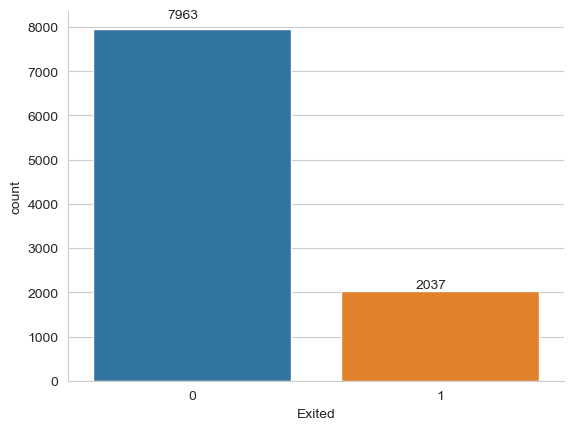

In [14]:
ax=sns.countplot(df['Exited'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

# Age

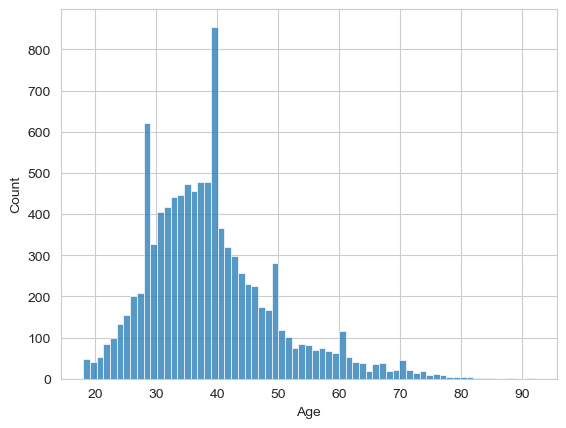

In [15]:
sns.histplot(x="Age", data=df);

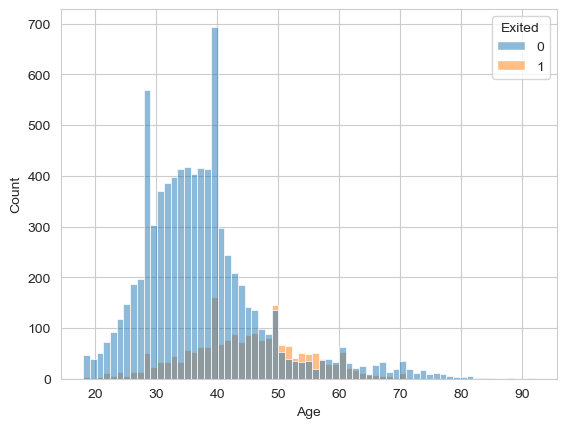

In [16]:
sns.histplot(x='Age', hue='Exited', data=df, alpha=0.5);

<AxesSubplot:xlabel='Exited', ylabel='Age'>

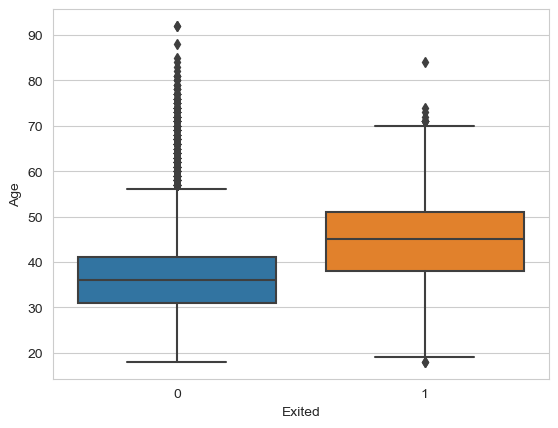

In [17]:
sns.boxplot(y='Age', x='Exited', data=df)

# CreditScore

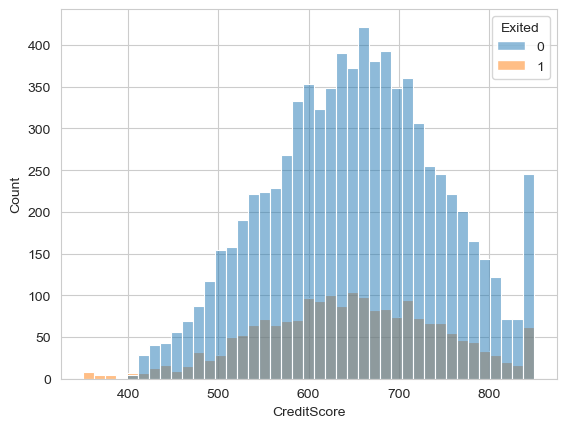

In [18]:
sns.histplot(x='CreditScore',data=df, hue='Exited');

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

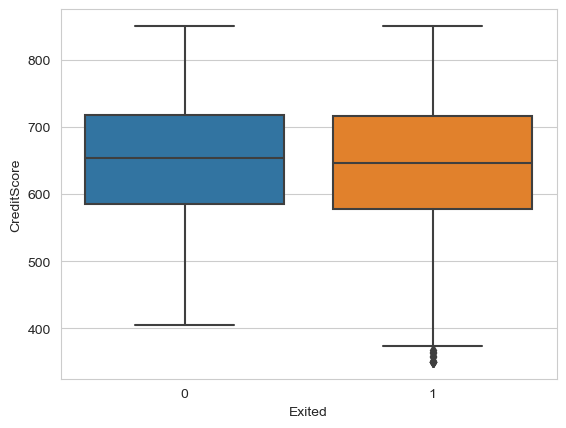

In [19]:
sns.boxplot(y='CreditScore', x='Exited', data=df)

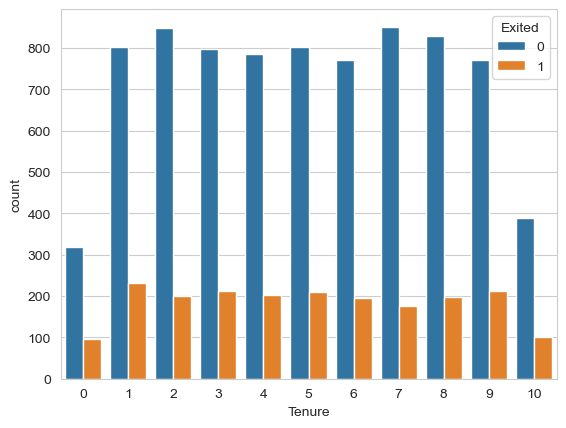

In [20]:
sns.countplot(x="Tenure",hue= 'Exited', data=df);

In [21]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

# Balance & EstimatedSalary

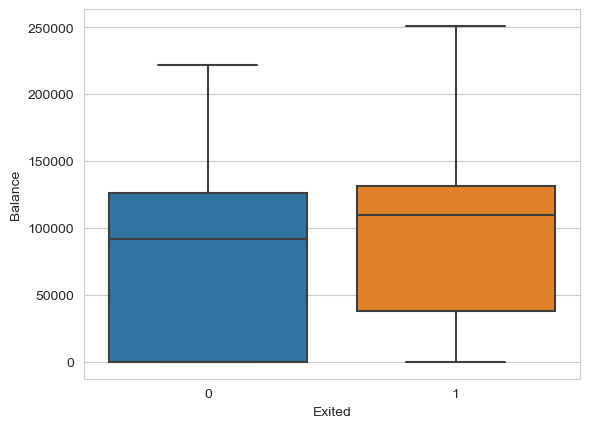

In [22]:
sns.boxplot(y='Balance', x='Exited', data=df);

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

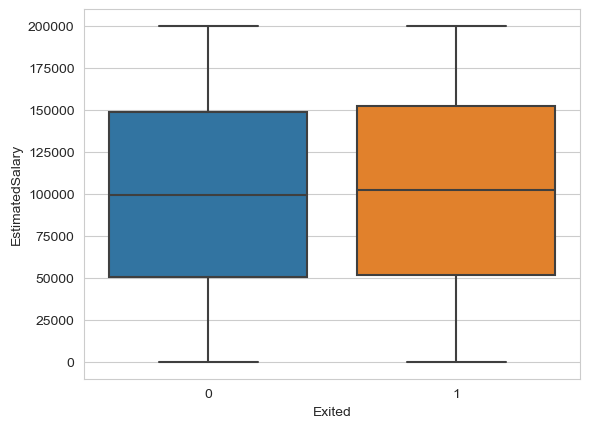

In [23]:
sns.boxplot(y='EstimatedSalary', x='Exited', data=df)

/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

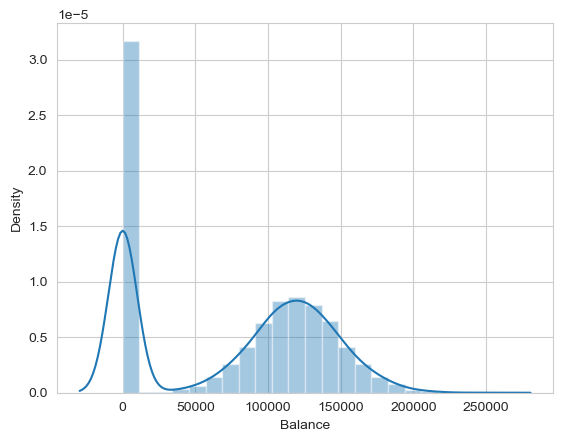

In [24]:
sns.distplot(df.Balance)

# HasCrCard

In [25]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

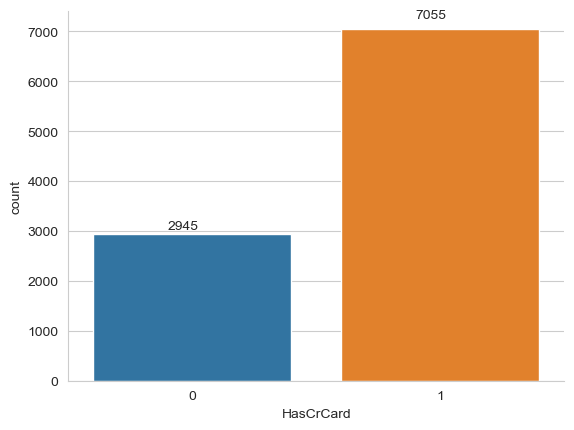

In [26]:
ax=sns.countplot(x='HasCrCard', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [27]:
df.groupby('HasCrCard')['Exited'].sum()

HasCrCard
0     613
1    1424
Name: Exited, dtype: int64

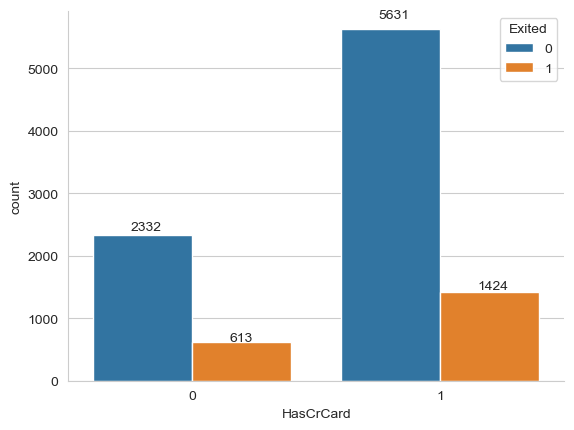

In [28]:
ax=sns.countplot(x="HasCrCard",hue= 'Exited', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() * 1.03));

# IsActiveMember

In [29]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [30]:
df.groupby('IsActiveMember')['Exited'].sum()

IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64

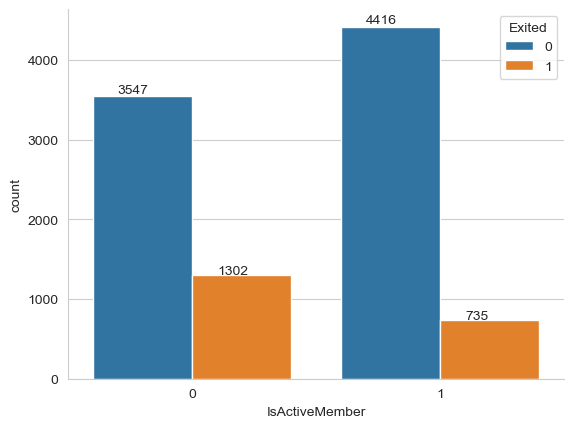

In [31]:
ax=sns.countplot(x="IsActiveMember",hue= 'Exited', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() * 1.01));

# NumOfProducts

In [32]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [33]:
df.groupby('NumOfProducts')['Exited'].sum()

NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

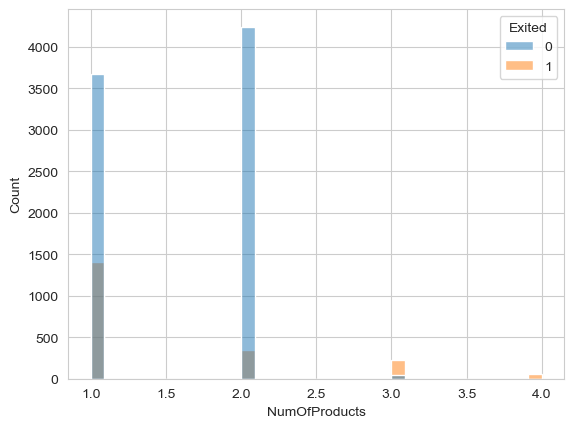

In [34]:
sns.histplot(x="NumOfProducts",hue= 'Exited', data=df);

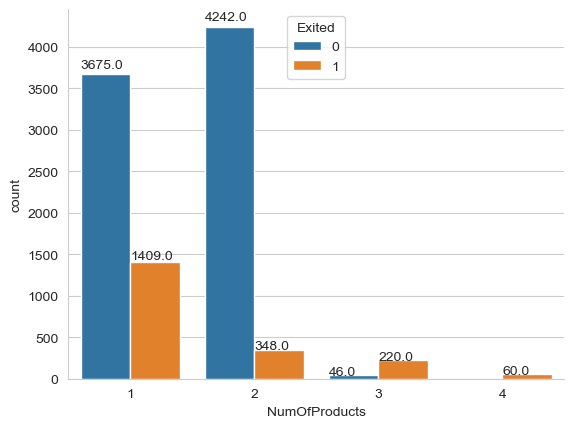

In [35]:
ax=sns.countplot(x="NumOfProducts",hue= 'Exited', data=df)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() * 1.02));

# Geography

In [36]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [37]:
df = pd.get_dummies(df, drop_first=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


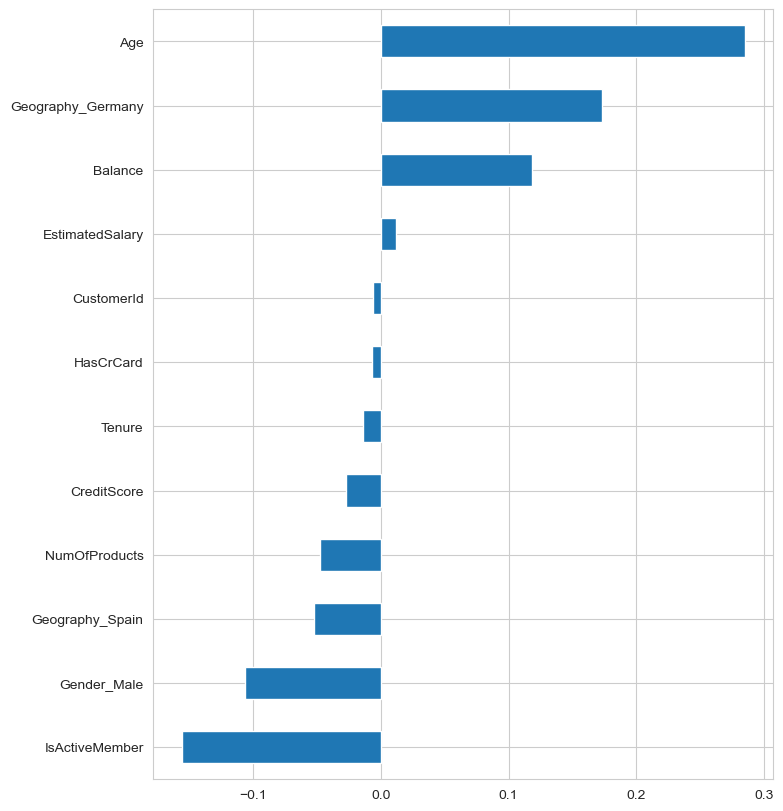

In [39]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

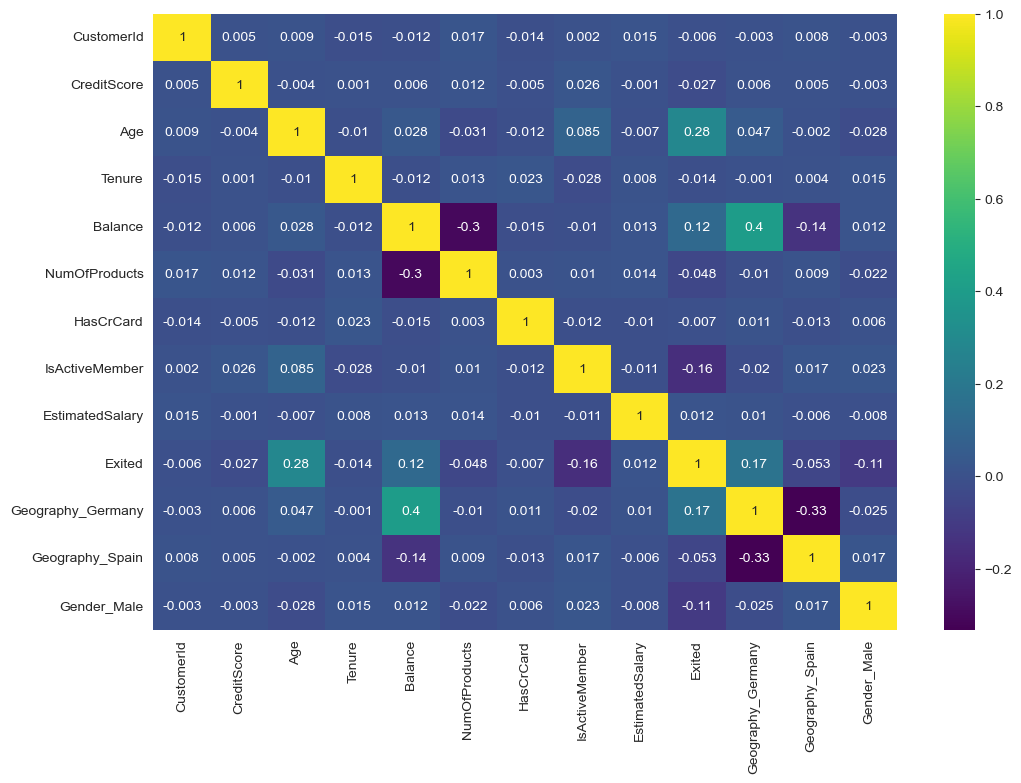

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(3), annot=True, cmap='viridis');

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [42]:
from sklearn.model_selection import train_test_split
df.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [43]:
df.shape

(10000, 13)

In [44]:
X=df[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'Geography_Germany', 'Geography_Spain', 'Gender_Male']]
y= df['Exited']

In [45]:
# cat = X.select_dtypes("object").columns
# cat 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [47]:
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# column_trans = ColumnTransformer([('cat', OneHotEncoder(),[0])], 
#                                        remainder='passthrough')

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [88]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

## without class_weigth

### Create The Model

In [51]:
!python --version

Python 3.8.13


In [52]:
#!pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__

In [54]:
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [57]:
X_train.shape

(9000, 11)

In [4]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



In [59]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['Recall'])

In [1]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, verbose=1)

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.weights

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.4923,0.0000,0.4952,0.0000
1,0.4713,0.0006,0.4847,0.0000
2,0.4605,0.0238,0.4704,0.0609
3,0.4472,0.0630,0.4545,0.1015
4,0.4303,0.1461,0.4326,0.1675


<AxesSubplot:>

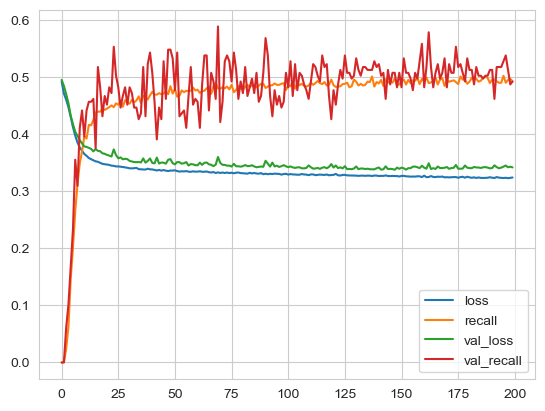

In [65]:
loss_df.plot()

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[770  26]
 [123  81]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.76      0.40      0.52       204

    accuracy                           0.85      1000
   macro avg       0.81      0.68      0.72      1000
weighted avg       0.84      0.85      0.83      1000



32/32 [==============================] - 0s 3ms/step


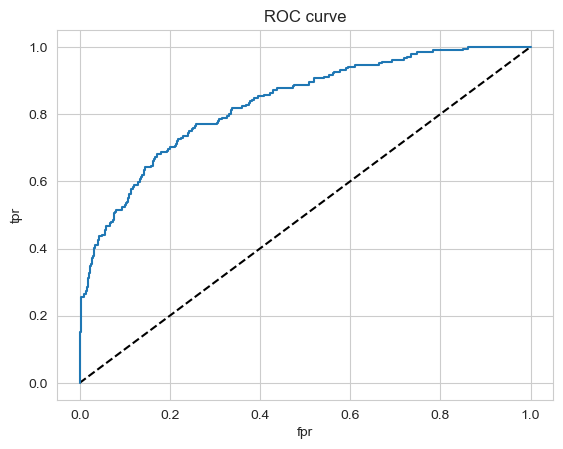

In [67]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [111]:
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
tf.random.set_seed(101)
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(y_train),
                                                  y_train)

In [114]:
class_weights

array([0.62787777, 2.45499182])

In [115]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [5]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 200, verbose=1 )

<AxesSubplot:>

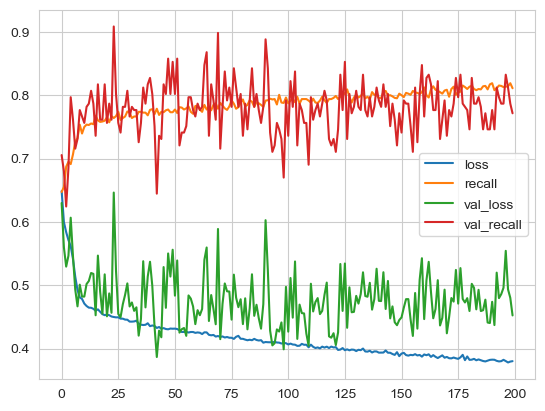

In [117]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [118]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[634 162]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.46      0.68      0.55       204

    accuracy                           0.77      1000
   macro avg       0.68      0.74      0.70      1000
weighted avg       0.82      0.77      0.79      1000



32/32 [==============================] - 0s 2ms/step


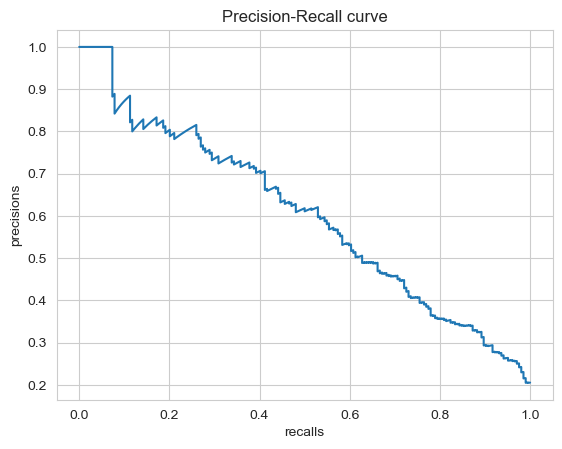

In [119]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
tf.random.set_seed(101)
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(y_train),
                                                  y_train)

In [122]:
class_weights

array([0.62787777, 2.45499182])

In [123]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [6]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 200, verbose=1 )

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<AxesSubplot:>

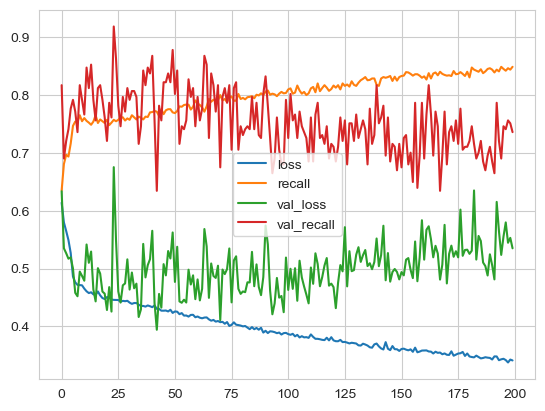

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [126]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[639 157]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.47      0.70      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.78      0.79      1000



32/32 [==============================] - 0s 3ms/step


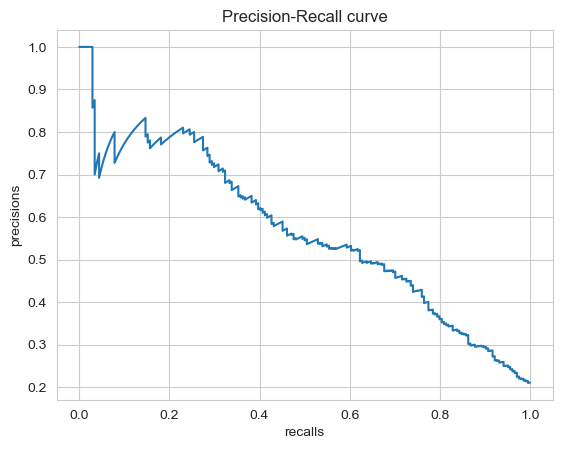

In [127]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


### Add Dropout Layer

In [128]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss ="binary_crossentropy", metrics=['Recall'])

In [7]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32,class_weight=class_weights, epochs = 200, verbose = 1)

<AxesSubplot:>

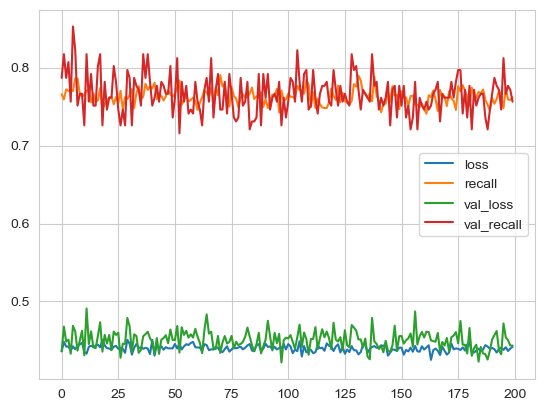

In [132]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [133]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 6ms/step
[[647 149]
 [ 66 138]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.48      0.68      0.56       204

    accuracy                           0.79      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.79      0.80      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [134]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15, restore_best_weights = True)

In [8]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 200, callbacks = [early_stop])

#### Monitor the "val_recall" as metric

<AxesSubplot:>

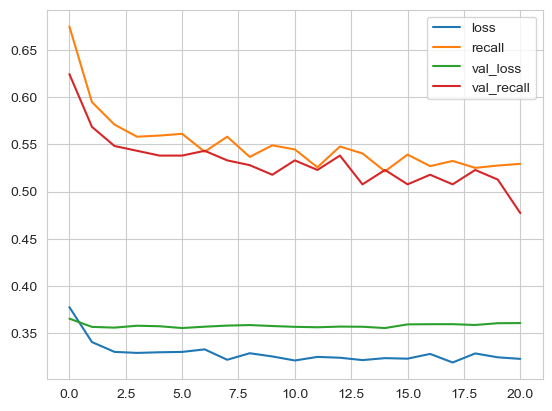

In [136]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## GridSearchCV

In [142]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [143]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [144]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [145]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train,class_weight=class_weights, callbacks = [early_stop])

In [148]:
grid_model.best_score_

0.7151657865234582

In [149]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [150]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 948us/step
[[646 150]
 [ 78 126]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       796
           1       0.46      0.62      0.52       204

    accuracy                           0.77      1000
   macro avg       0.67      0.71      0.69      1000
weighted avg       0.80      0.77      0.78      1000



32/32 [==============================] - 0s 1ms/step


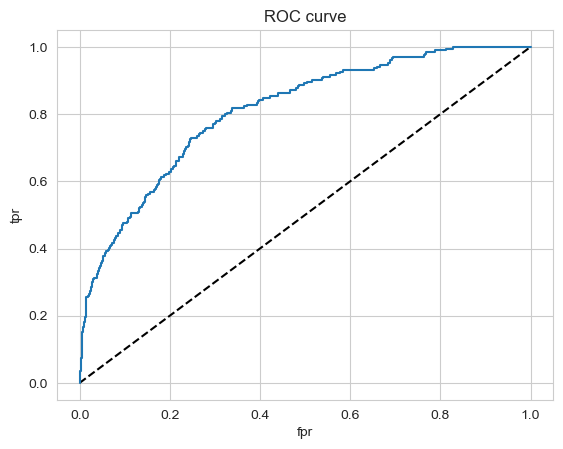

In [151]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [152]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr=0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [163]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights) 

<AxesSubplot:>

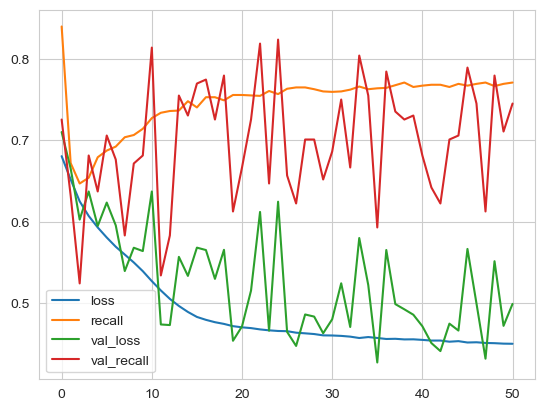

In [165]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [166]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 941us/step
[[679 117]
 [ 83 121]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       796
           1       0.51      0.59      0.55       204

    accuracy                           0.80      1000
   macro avg       0.70      0.72      0.71      1000
weighted avg       0.81      0.80      0.81      1000



In [167]:
model.save('model_cancer.h5')

## Prediction

In [177]:
single_customer = df.drop(columns=['Exited','CustomerId']).iloc[0]
single_customer

CreditScore            619.0000
Age                     42.0000
Tenure                   2.0000
Balance                  0.0000
NumOfProducts            1.0000
HasCrCard                1.0000
IsActiveMember           1.0000
EstimatedSalary     101348.8800
Geography_Germany        0.0000
Geography_Spain          0.0000
Gender_Male              0.0000
Name: 0, dtype: float64

In [178]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50678999, 0.        , 0.        ,
        0.        ]])

In [179]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 25ms/step


array([[1]], dtype=int32)

In [180]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___